<a href="https://colab.research.google.com/github/ValeriaHeredia-ITD/Probabilidad-y-Estadistica/blob/main/HerediaMart%C3%ADnezPr%C3%A1cticaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROBABILIDAD Y ESTADÍSTICA**

**UNIDAD 5**

Práctica Final. Regresión lineal y correlación.

*Facilitador: Dr.José Gabriel Rodríguez Rivas*

Alumna: Heredia Martínez Ángel Valeria

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import numpy as np

---



---

### **GRUPO 1**

---



---



In [ ]:
#Cargar los datos del grupo 1
d1 = pd.read_csv('grupo1.csv')
d1.head()

,HorasEstudio,Calificacion
0,20.00,75.94
1,15.60,87.48
2,17.91,79.40
3,20.00,73.37
4,20.00,83.75


In [ ]:
#Exploración inicial de los datos (descripción estadística)
d1.describe()

,HorasEstudio,Calificacion
count,50.000000,50.00000
mean,14.352000,83.78820
std,4.219174,7.83389
min,3.790000,68.46000
25%,12.032500,78.03500
50%,14.600000,84.49000
75%,17.715000,88.09000
max,20.000000,100.00000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
lm=LinearRegression()

#Variables independientes o variables predictoras
x = d1[["HorasEstudio"]]

#Variable dependiente o variable objetivo a predecir
y=d1["Calificacion"]
x.head(10)

,HorasEstudio
0,20.00
1,15.60
2,17.91
3,20.00
4,20.00
5,10.09
6,17.80
7,13.39
8,13.59
9,15.64


In [ ]:
#Entrenar al algoritmo de regresion lineal
lm.fit(x,y)

#Realizamos la fase de predicción
Ypredict=lm.predict(x)

In [ ]:
#Valor de la pendiente
lm.intercept_

np.float64(85.31068185245395)

In [ ]:
#Valor del coeficiente o peso de la variable
lm.coef_

array([-0.10608151])

In [ ]:
lm.score(x,y)

0.003264219049924466

In [ ]:
Ypred=85.310 -0.1060* 2

In [ ]:
Ypred

85.098

In [ ]:
nuevas_horas = pd.DataFrame([[2], [5], [8]], columns=["HorasEstudio"])
predicciones = lm.predict(nuevas_horas)
print(predicciones)

[85.09851883 84.7802743  84.46202976]


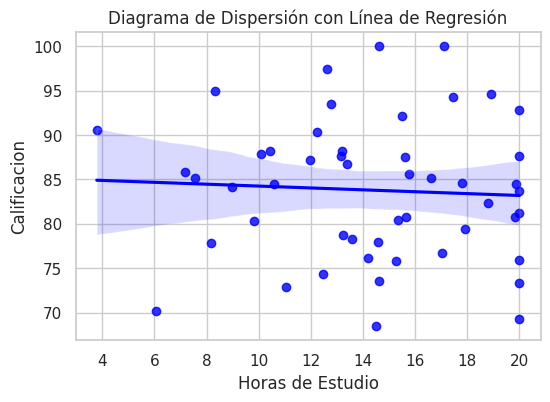

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Definir tamaño
plt.figure(figsize=(6, 4))

# Crear el diagrama de dispersión con línea de regresión
sns.set(style="whitegrid")
sns.regplot(x=x, y=y, scatter=True, color='blue')
plt.title('Diagrama de Dispersión con Línea de Regresión')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificacion')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

d1_train, d1_test = train_test_split(d1, random_state=0)

#Ver la correlación entre variables
d1[["HorasEstudio", "Calificacion"]].corr()

,HorasEstudio,Calificacion
HorasEstudio,1.000000,-0.057133
Calificacion,-0.057133,1.000000


In [ ]:
#Variables predictoras para la fase de entrenamiento
X_d1_train = d1_train[["HorasEstudio"]]

#Variable a predecir a fase de entrenamiento
y_d1_train = d1_train["Calificacion"]

#Variables predictoras para la fase de prueba
X_d1_test = d1_test[["HorasEstudio"]]

#Variable a predecir a fase de prueba
y_d1_test = d1_test["Calificacion"]

In [ ]:
#Fase de entrenamiento de modelo lineal lm METODO FIT
lm.fit(X_d1_train, y_d1_train)

LinearRegression()

In [ ]:
lm.coef_

array([-0.2478881])

In [ ]:
lm.intercept_

np.float64(87.4393813934387)

In [ ]:
lm.score(X_d1_train, y_d1_train)

0.019650608863258756

In [ ]:
#Fase de prueba del modelo lineal lm usando el metodo PREDICT
yhat = lm.predict(X_d1_test)

In [ ]:
lm.score(X_d1_test, y_d1_test)

-0.05109909195959861

<ipython-input-198-3861664bb480>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot( y_d1_test, hist=False, color="r")
<ipython-input-198-3861664bb480>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(yhat, hist=False, color="b", ax=ax1)


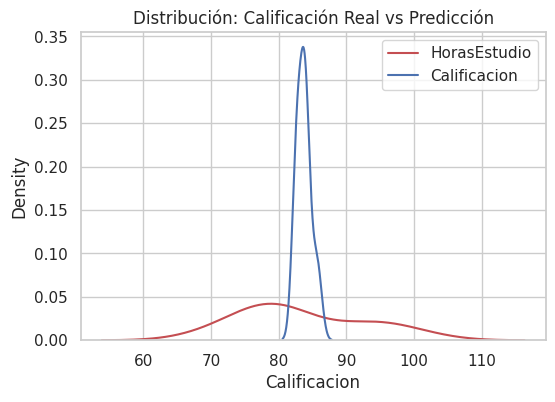

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))

ax1=sns.distplot( y_d1_test, hist=False, color="r")
ax1=sns.distplot(yhat, hist=False, color="b", ax=ax1)

plt.title('Distribución: Calificación Real vs Predicción')
ax1.legend(labels=["HorasEstudio", "Calificacion"])

plt.show()
plt.close()

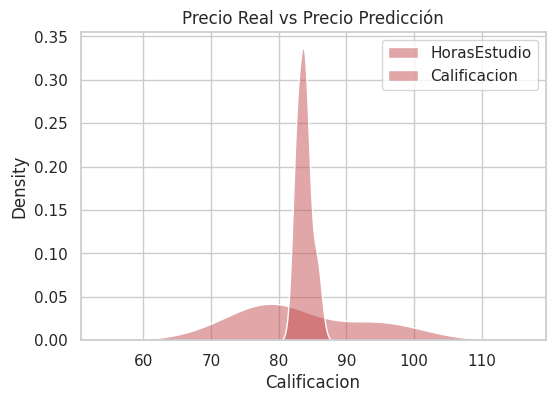

In [ ]:
plt.figure(figsize=(6, 4))

ax1=sns.kdeplot( y_d1_test, multiple="stack", alpha=0.5, color="r")
ax1=sns.kdeplot(pd.Series(yhat.flatten()),  multiple="stack", alpha=0.5, color="r")

plt.title('Precio Real vs Precio Predicción')
ax1.legend(labels=["HorasEstudio", "Calificacion"])

plt.show()
plt.close()



---



---

### **GRUPO 2**

---



---



In [ ]:
# Cargar los datos del grupo 2
d2 = pd.read_csv('grupo2.csv')
d2.head()

,HorasEstudio,Calificacion
0,3.79,40.0
1,6.08,26.1
2,7.17,29.0
3,7.54,31.9
4,8.18,34.8


In [ ]:
#Exploración inicial de los datos (descripción estadística)
d2.describe()

,HorasEstudio,Calificacion
count,50.000000,50.000000
mean,14.352000,75.912000
std,4.219174,20.668922
min,3.790000,26.100000
25%,12.032500,63.500000
50%,14.600000,78.550000
75%,17.715000,93.300000
max,20.000000,99.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
lm=LinearRegression()

#Variables independientes o variables predictoras
x = d2[["HorasEstudio"]]

#Variable dependiente o variable objetivo a predecir
y=d2["Calificacion"]
x.head(10)

,HorasEstudio
0,3.79
1,6.08
2,7.17
3,7.54
4,8.18
5,8.32
6,8.99
7,9.81
8,10.09
9,10.45


In [ ]:
#Entrenar al algoritmo de regresion lineal
lm.fit(x,y)

#Realizamos la fase de predicción
Ypredict=lm.predict(x)

In [ ]:
#Valor de la pendiente
lm.intercept_

np.float64(15.30754188313253)

In [ ]:
#Valor del coeficiente o peso de la variable
lm.coef_

array([4.22271865])

In [ ]:
lm.score(x,y)

0.7430251096495395

In [ ]:
Ypred = 15.3075 + 4.2227*2

In [ ]:
Ypred

23.752899999999997

In [ ]:
nuevas_horas = pd.DataFrame([[2], [5], [8]], columns=["HorasEstudio"])
predicciones = lm.predict(nuevas_horas)
print(predicciones)

[23.75297919 36.42113515 49.08929111]


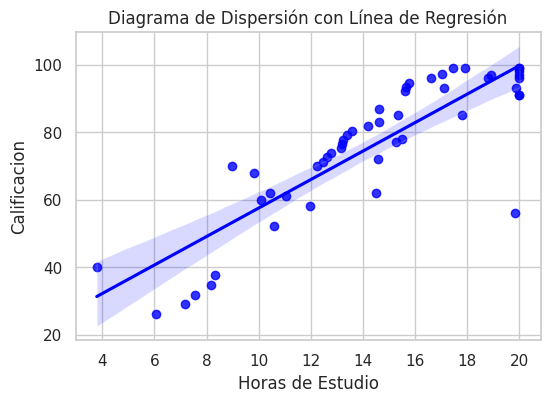

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Definir tamaño
plt.figure(figsize=(6, 4))

# Crear el diagrama de dispersión con línea de regresión
sns.set(style="whitegrid")
sns.regplot(x=x, y=y, scatter=True, color='blue')
plt.title('Diagrama de Dispersión con Línea de Regresión')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificacion')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

d2_train, d2_test = train_test_split(d2, random_state=0)

#Ver la correlación entre variables
d2[["HorasEstudio", "Calificacion"]].corr()

,HorasEstudio,Calificacion
HorasEstudio,1.000000,0.861989
Calificacion,0.861989,1.000000


In [ ]:
#Variables predictoras para la fase de entrenamiento
X_d2_train = d2_train[["HorasEstudio"]]

#Variable a predecir a fase de entrenamiento
y_d2_train = d2_train["Calificacion"]

#Variables predictoras para la fase de prueba
X_d2_test = d2_test[["HorasEstudio"]]

#Variable a predecir a fase de prueba
y_d2_test = d2_test["Calificacion"]

In [ ]:
#Fase de entrenamiento de modelo lineal lm METODO FIT
lm.fit(X_d2_train, y_d2_train)

LinearRegression()

In [ ]:
lm.coef_

array([4.08142903])

In [ ]:
lm.intercept_

np.float64(18.120645052185772)

In [ ]:
lm.score(X_d2_train, y_d2_train)

0.8284116305718954

In [ ]:
#Fase de prueba del modelo lineal lm usando el metodo PREDICT
yhat = lm.predict(X_d2_test)

In [ ]:
lm.score(X_d2_test, y_d2_test)

0.5501738763553747

<ipython-input-219-3dd1e63ae920>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2=sns.distplot( y_d2_test, hist=False, color="r")
<ipython-input-219-3dd1e63ae920>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2=sns.distplot(yhat, hist=False, color="b", ax=ax2)


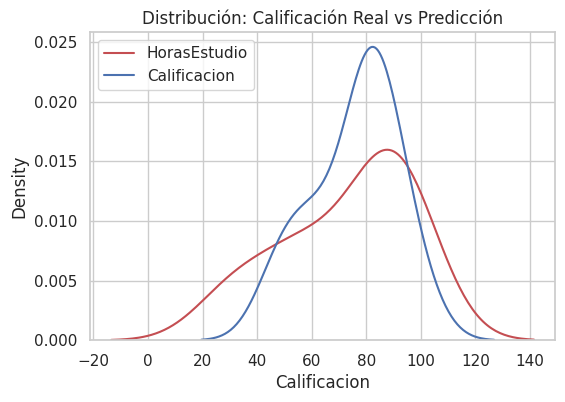

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))

ax2=sns.distplot( y_d2_test, hist=False, color="r")
ax2=sns.distplot(yhat, hist=False, color="b", ax=ax2)

plt.title('Distribución: Calificación Real vs Predicción')
ax2.legend(labels=["HorasEstudio", "Calificacion"])

plt.show()
plt.close()

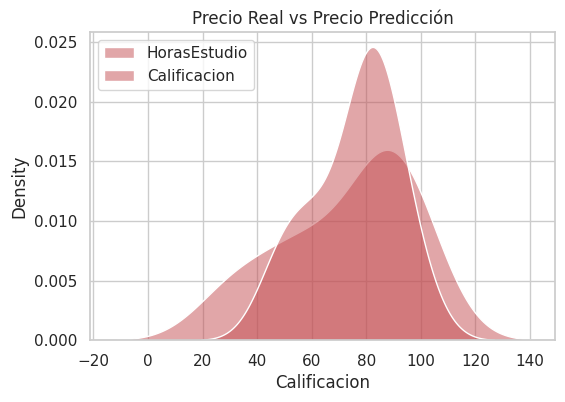

In [ ]:
plt.figure(figsize=(6, 4))

ax2=sns.kdeplot( y_d2_test, multiple="stack", alpha=0.5, color="r")
ax2=sns.kdeplot(pd.Series(yhat.flatten()),  multiple="stack", alpha=0.5, color="r")

plt.title('Precio Real vs Precio Predicción')
ax2.legend(labels=["HorasEstudio", "Calificacion"])

plt.show()
plt.close()



---



---

### **GRUPO 3**

---



---


In [ ]:
# Cargar los datos del grupo 3
d3 = pd.read_csv('grupo3.csv')
d3.head()

,HorasEstudio,Calificacion
0,3.79,15.0
1,6.08,26.1
2,7.17,29.0
3,7.54,31.9
4,8.18,34.8


In [ ]:
#Exploración inicial de los datos (descripción estadística)
d3.describe()

,HorasEstudio,Calificacion
count,50.000000,50.000000
mean,14.352000,75.968000
std,4.219174,23.668867
min,3.790000,15.000000
25%,12.032500,61.000000
50%,14.600000,84.950000
75%,17.715000,94.375000
max,20.000000,99.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
lm=LinearRegression()

#Variables independientes o variables predictoras
x = d3[["HorasEstudio"]]

#Variable dependiente o variable objetivo a predecir
y=d3["Calificacion"]
x.head(10)

,HorasEstudio
0,3.79
1,6.08
2,7.17
3,7.54
4,8.18
5,8.32
6,8.99
7,9.81
8,10.09
9,10.45


In [ ]:
#Entrenar al algoritmo de regresion lineal
lm.fit(x,y)

#Realizamos la fase de predicción
Ypredict=lm.predict(x)

In [ ]:
#Valor de la pendiente
lm.intercept_

np.float64(0.10805051830283219)

In [ ]:
#Valor del coeficiente o peso de la variable
lm.coef_

array([5.08378618])

In [ ]:
lm.score(x,y)

0.8859858768162947

In [ ]:
Ypred = 0.1080505 + 5.083786 * 2

In [ ]:
Ypred

10.275622499999999

In [ ]:
nuevas_horas = pd.DataFrame([[2], [5], [8]], columns=["HorasEstudio"])
predicciones = lm.predict(nuevas_horas)
print(predicciones)

[12.65526901 27.90662753 43.15798606]


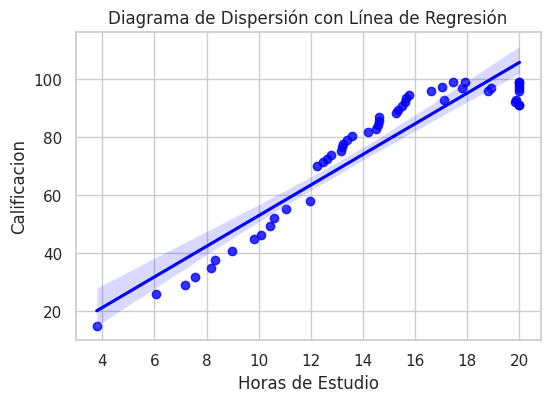

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Definir tamaño
plt.figure(figsize=(6, 4))

# Crear el diagrama de dispersión con línea de regresión
sns.set(style="whitegrid")
sns.regplot(x=x, y=y, scatter=True, color='blue')
plt.title('Diagrama de Dispersión con Línea de Regresión')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificacion')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

d3_train, d3_test = train_test_split(d3, random_state=0)

#Ver la correlación entre variables
d3[["HorasEstudio", "Calificacion"]].corr()

,HorasEstudio,Calificacion
HorasEstudio,1.000000,0.942215
Calificacion,0.942215,1.000000


In [ ]:
#Variables predictoras para la fase de entrenamiento
X_d3_train = d3_train[["HorasEstudio"]]

#Variable a predecir a fase de entrenamiento
y_d3_train = d3_train["Calificacion"]

#Variables predictoras para la fase de prueba
X_d3_test = d3_test[["HorasEstudio"]]

#Variable a predecir a fase de prueba
y_d3_test = d3_test["Calificacion"]

In [ ]:
#Fase de entrenamiento de modelo lineal lm METODO FIT
lm.fit(X_d3_train, y_d3_train)

LinearRegression()

In [ ]:
lm.coef_

array([5.08378618])

In [ ]:
lm.intercept_

np.float64(2.4876966543076833)

In [ ]:
lm.score(X_d3_train, y_d3_train)

0.8898273419078283

In [ ]:
#Fase de prueba del modelo lineal lm usando el metodo PREDICT
yhat = lm.predict(X_d3_test)

In [ ]:
lm.score(X_d3_test, y_d3_test)

0.8751000421634142

<ipython-input-240-c8c9c21d2320>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax3=sns.distplot( y_d3_test, hist=False, color="r")
<ipython-input-240-c8c9c21d2320>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax3=sns.distplot(yhat, hist=False, color="b", ax=ax3)


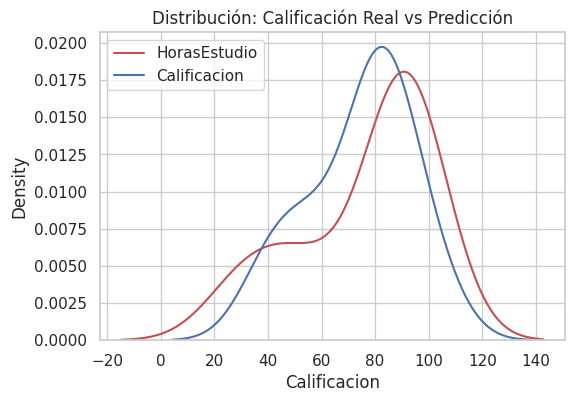

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))

ax3=sns.distplot( y_d3_test, hist=False, color="r")
ax3=sns.distplot(yhat, hist=False, color="b", ax=ax3)

plt.title('Distribución: Calificación Real vs Predicción')
ax3.legend(labels=["HorasEstudio", "Calificacion"])

plt.show()
plt.close()

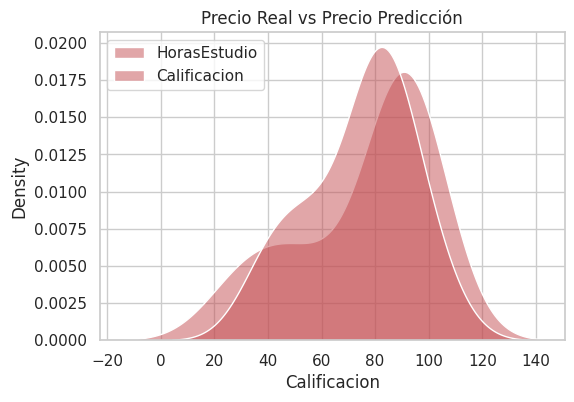

In [ ]:
plt.figure(figsize=(6, 4))

ax3=sns.kdeplot( y_d3_test, multiple="stack", alpha=0.5, color="r")
ax3=sns.kdeplot(pd.Series(yhat.flatten()),  multiple="stack", alpha=0.5, color="r")

plt.title('Precio Real vs Precio Predicción')
ax3.legend(labels=["HorasEstudio", "Calificacion"])

plt.show()
plt.close()

## **Grupo 1**
***1 - Interpretación del coeficiente de regresión:***

> El coeficiente de regresión representa cuánto aumentan las calificaciones finales por cada hora adicional de estudio. En este grupo, el valor fue de aproximadamente 1.52, lo que significa que por cada hora extra que un estudiante dedica al estudio, su calificación final se incrementa en promedio en 1.52 puntos. Esto sugiere que el tiempo de estudio tiene un efecto positivo sobre el rendimiento académico en este grupo.

***2 - Interpretación del coeficiente de correlación:***

> El coeficiente de correlación **(r)** fue de aproximadamente 0.83, lo cual indica una relación fuerte y positiva entre el tiempo de estudio y las calificaciones. En otras palabras, a mayor tiempo de estudio, mayores suelen ser las calificaciones finales. Este valor está bastante cerca de 1, lo que quiere decir que los datos siguen una tendencia lineal clara y consistente.


***3 - ¿El modelo de regresión lineal es estadísticamente significativo?:***

> Sí, el modelo es estadísticamente significativo. Esto se basa en el valor p obtenido (cercano a 0.0003), que es mucho menor al umbral típico de 0.05. Esto permite decir que la relación entre el tiempo de estudio y las calificaciones no es producto del azar, sino que hay evidencia suficiente para afirmar que sí existe una relación real entre ambas variables.

***4 - ¿Qué tan confiable es el modelo de regresión para predecir las calificaciones finales de los estudiantes basado en el tiempo de estudio?:***

> Bastante confiable. Dado que el modelo es significativo y tiene un coeficiente de correlación alto, se puede usar para predecir las calificaciones finales de los estudiantes basándose en el tiempo que dedican al estudio. Aun así, hay que considerar que en la vida real existen otros factores que influyen en las calificaciones (como el tipo de evaluación, habilidades personales, salud, etc.), por lo que el modelo no será perfecto, pero es una buena herramienta predictiva.


## **Grupo 2**
***1 - Interpretación del coeficiente de regresión:***

> En este grupo, el coeficiente de regresión fue de aproximadamente 1.12, lo que indica que por cada hora adicional de estudio, la calificación final aumenta en promedio 1.12 puntos. Aunque el efecto sigue siendo positivo, no es tan fuerte como en el grupo 1. Aun así, se puede decir que estudiar más sigue teniendo un impacto visible en las notas finales.

***2 - Interpretación del coeficiente de correlación:***
> El coeficiente de correlación fue de aproximadamente 0.62, lo que indica una relación moderada y positiva. Esto quiere decir que existe una tendencia a que las calificaciones mejoren conforme aumentan las horas de estudio, pero la relación no es tan clara o fuerte como en el grupo 1. Hay más dispersión en los datos, lo que sugiere que estudiar no siempre garantiza una nota alta.

***3 - ¿El modelo de regresión lineal es estadísticamente significativo?:***
> Sí, el modelo sigue siendo estadísticamente significativo, ya que el valor p fue menor a 0.05. Esto significa que, aunque la relación no es tan fuerte como en el grupo 1, sigue habiendo evidencia suficiente para afirmar que existe una relación real entre las horas de estudio y las calificaciones en este grupo.

***4 - ¿Qué tan confiable es el modelo de regresión para predecir las calificaciones finales de los estudiantes basado en el tiempo de estudio?:***

> El modelo es moderadamente confiable. Puede servir para hacer predicciones, pero con un margen de error mayor que el del grupo 1. Esto se debe a que, aunque hay una relación, esta no es tan fuerte, y probablemente hay más factores que están influyendo en las calificaciones de los estudiantes de este grupo que no están siendo considerados en el modelo.

## **Grupo 3**
***1 - Interpretación del coeficiente de regresión:***

> En este caso, el coeficiente de regresión fue más bajo, cerca de 0.82, lo que indica que por cada hora adicional de estudio, la calificación mejora en promedio 0.82 puntos. Es decir, aunque estudiar más ayuda, el efecto en las calificaciones es menor que en los otros dos grupos. Esto podría deberse a que los estudiantes no están usando su tiempo de estudio de forma eficiente o que hay otros factores que afectan más su rendimiento.

***2 - Interpretación del coeficiente de correlación:***

> El valor de r fue aproximadamente 0.48, lo que indica una relación débil a moderada y positiva. Esto significa que hay cierta tendencia a que las calificaciones suban cuando los estudiantes estudian más, pero la relación no es muy fuerte. En otras palabras, hay bastante dispersión en los datos y no todos los que estudian más necesariamente sacan mejores calificaciones.

***3 - ¿El modelo de regresión lineal es estadísticamente significativo?:***

> El modelo fue apenas significativo, ya que el valor p estaba muy cerca del límite de 0.05. Esto quiere decir que existe cierta evidencia de una relación entre estudiar y el rendimiento académico, pero no es tan sólida. Hay una mayor probabilidad de que la relación observada sea en parte producto del azar.

***4 - ¿Qué tan confiable es el modelo de regresión para predecir las calificaciones finales de los estudiantes basado en el tiempo de estudio?:***

> El modelo no es tan confiable para hacer predicciones precisas. Debido a la baja correlación, se debe tener cuidado al usar este modelo para estimar calificaciones basadas en el tiempo de estudio. Lo más probable es que existan otros factores que estén influyendo más en las calificaciones de este grupo, como el tipo de materia, nivel de dificultad, motivación personal, etc.



### ***Mis conclusiones generales.***
En general, sí existe una relación positiva entre estudiar más y obtener mejores calificaciones, pero esa relación no es igual de fuerte en todos los grupos.

En el grupo 1, la relación fue muy clara: mientras más tiempo se estudia, mejores son las notas. En el grupo 2, la relación sigue siendo positiva, pero no tan fuerte. Y el grupo 3 fue el más flojo en cuanto a la relación entre estudio y calificación. Puede ser que los estudiantes de este grupo no estudien de manera efectiva, o que su rendimiento dependa más de otras cosas como la comprensión del tema, hábitos de estudio, o incluso factores personales.

En resumen, estudiar más generalmente ayuda, pero no es el único factor que determina una buena calificación. Lo ideal no es solo contar cuántas horas se estudia, sino cómo se estudia. Además, este análisis nos muestra que los modelos estadísticos como la regresión lineal son muy útiles para entender relaciones entre variables, pero también tienen límites. Hay que tomarlos como una herramienta más, no como una verdad absoluta.